## Import Library

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import load_iris
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve


In [2]:
# import dataset
data = pd.read_csv('https://raw.githubusercontent.com/danielfran11/heart-disease-dataset/main/heart.csv')
display(data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
data.shape

(1025, 14)

## Cek Missing Value

In [5]:
#Cek Missing Value
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Tidak ada missing value

## Duplicated Data

In [6]:
# Cek duplikasi data
data.duplicated().sum()

723

In [7]:
#Cek data Duplicated
duplicate_rows = data[data.duplicated()]
print("Data duplikat:")
duplicate_rows.head(1200).count()

Data duplikat:


age         723
sex         723
cp          723
trestbps    723
chol        723
fbs         723
restecg     723
thalach     723
exang       723
oldpeak     723
slope       723
ca          723
thal        723
target      723
dtype: int64

In [8]:
# Mengecek Duplikat data dan distinct row
distinct_count = len(data.drop_duplicates())
duplicate_count = len(data) - distinct_count
f'{distinct_count} distinct rows and {duplicate_count} duplicated rows'

'302 distinct rows and 723 duplicated rows'

In [9]:
# menghilangkan duplikat data
data1 = data.drop_duplicates()
data1.shape

(302, 14)

## Outlier

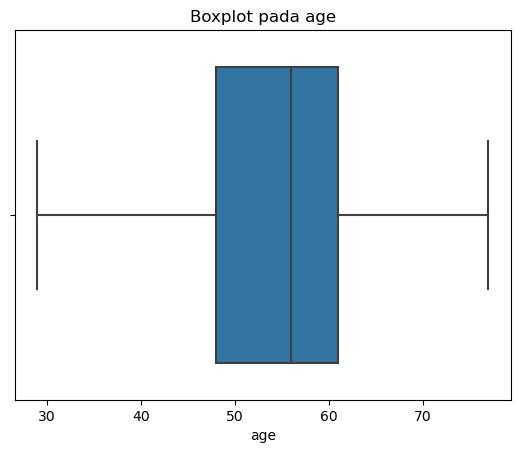

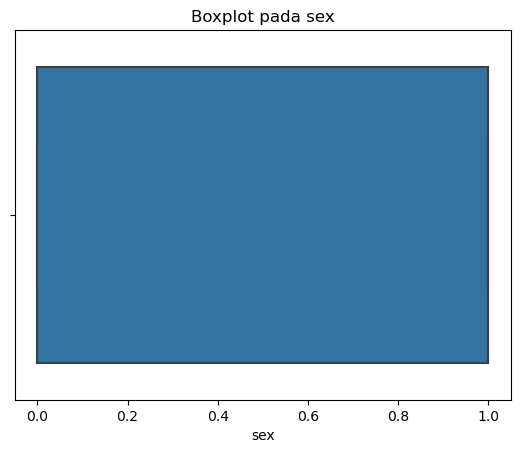

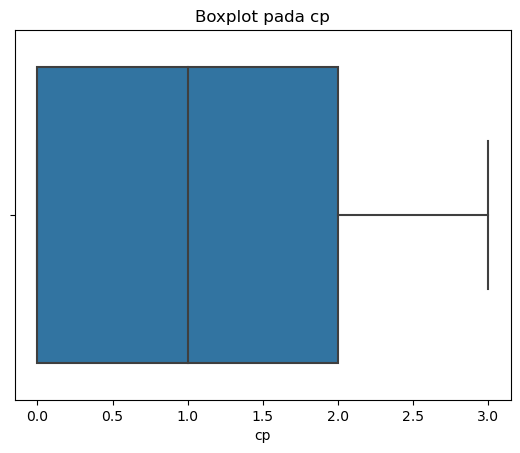

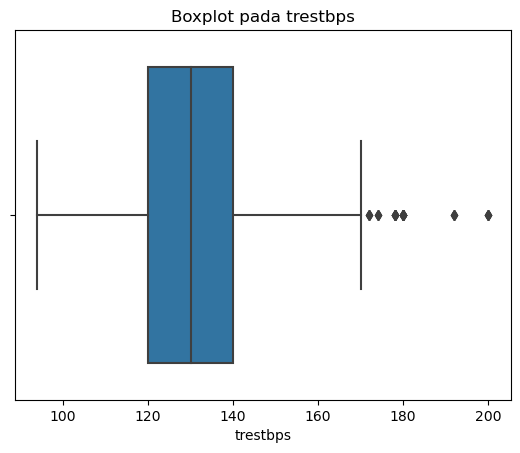

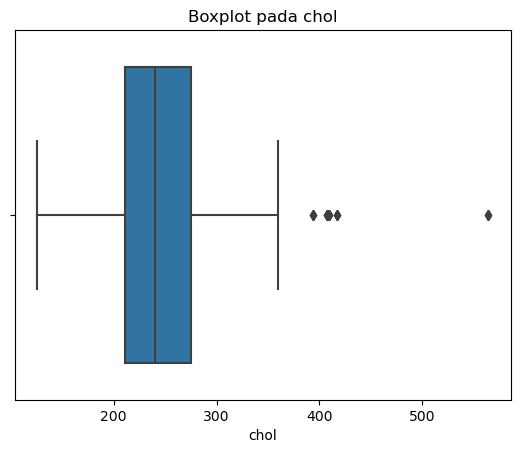

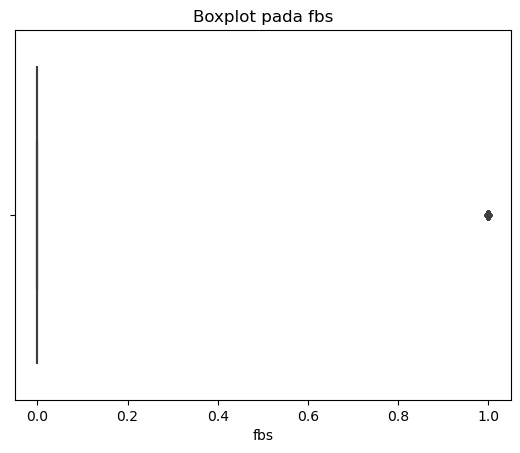

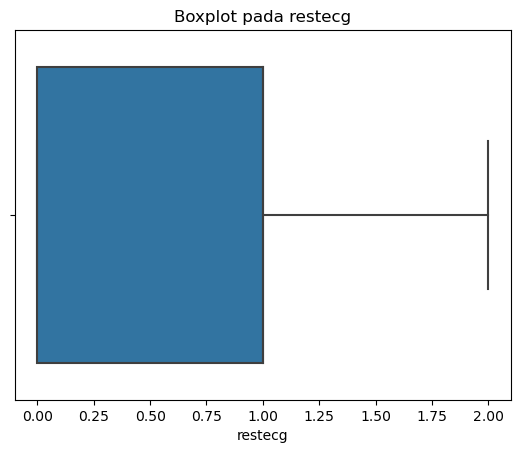

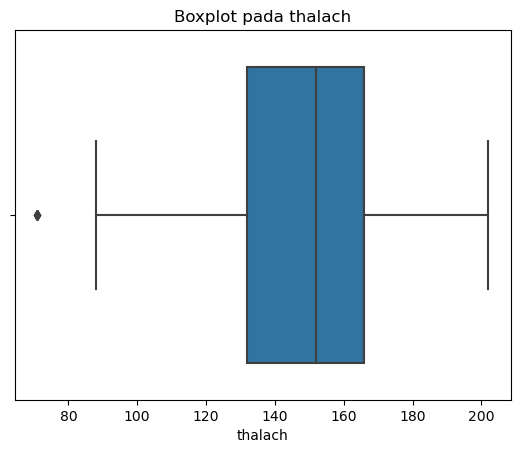

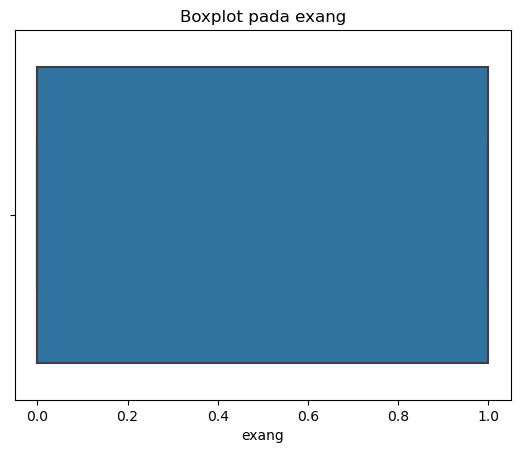

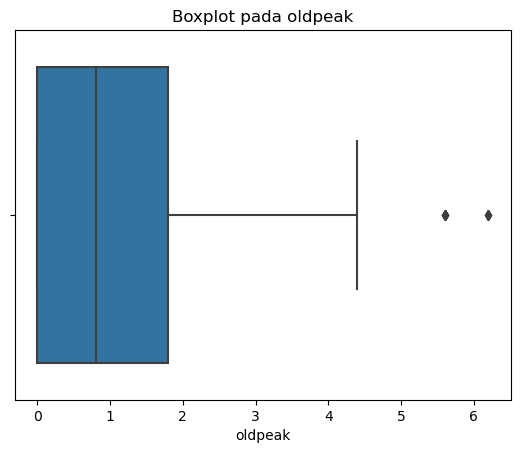

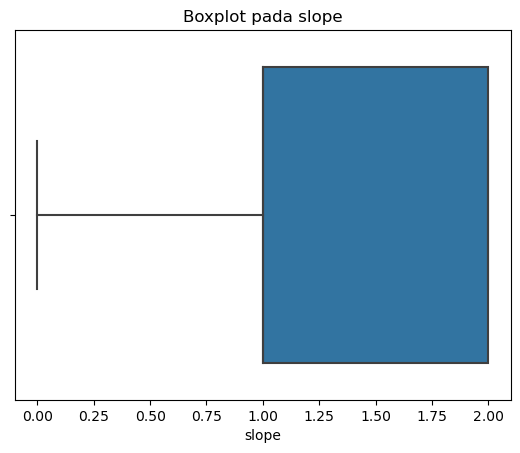

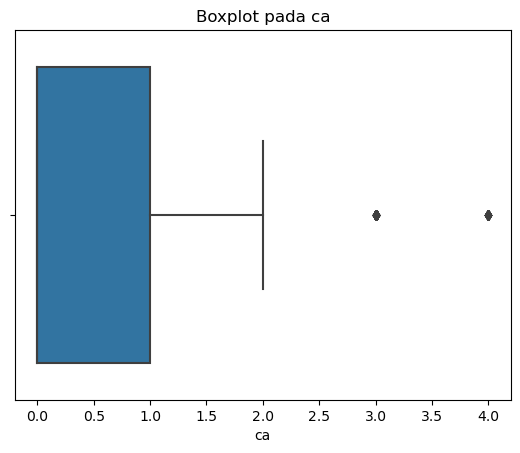

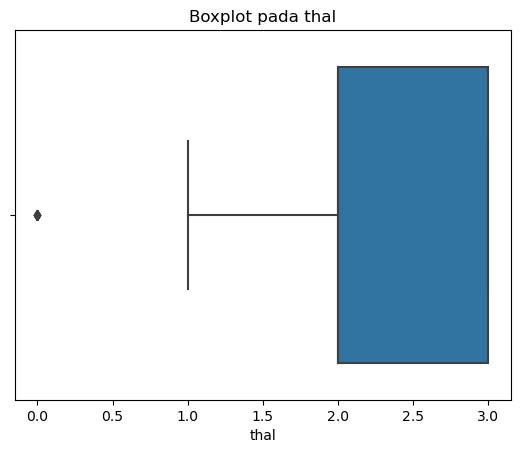

In [10]:
# list variabel untuk membuat boxplot
numerical_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

#buat boxplot dari masing masing feature untuk mengecek outlier
for feature in numerical_features:
    sns.boxplot( x=data[feature], data=data)
    plt.title(f'Boxplot pada {feature}')
    plt.show()

Jika dilihat dari Boxplot, masih terdapat beberapa outlier pada variabel trestbps, chol, fbs, thalach, oldpeak, ca, dan thal.

Walaupun masih terdapat outlier pada beberapa variabel, akan tetapi tidak boleh mengeleminasi outlier pada semua variabel, karena data outlier pada beberapa variabel masih dibutuhkan, contohnya pada variabel fbs, karena jika outlier pada fbs dieliminasi maka nilai fbs = 1 akan hilangnya semua, sedangkan data tentang pasien yang memiliki kadar gula di atas 120 mg/dL (fbs=1) masih dibutuhkan untuk proses prediksi.

Sedangkan itu untuk outlier pada variabel ca dan thal perlu dihilangkan karena pada variabel ca seharusnya range nilainya cuman 0-3 dan pada variabel thal seharusnya variabel itu nilainya 1,2,3. sehingga diluar dari range tersebut perlu untuk dieliminasi.

yang perlu dieliminasi nilai ca > 3 dan thal = 0 (Dilihat berdasarkan Bloxplot)
Karena tujuan dari model ini bukan untuk mengecek anomali, maka kita harus mendrop outlier pada variabel trestbps, chol, thalac, dan oldpeak

In [11]:
# eliminasi nilai ca > 3 dan thal = 0
data2 = data[(data['ca'] <= 3) & (data['thal'] != 0)]

In [12]:
# makesure apakah ca > 3  dan thal = 0 sudah tereliminasi
ca_4 = data2[data2['ca'] > 3]
thal_0 = data2[data2['thal'] == 0]
print(ca_4)
print(thal_0)

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


In [13]:
# Selanjutnya mengatasi outlier (drop)
q1 = np.percentile(data2['chol'], 25)
q3 = np.percentile(data2['chol'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data10 = data2[(data2['chol'] >= lower_bound) & (data2['chol'] <= upper_bound)]

q1 = np.percentile(data2['trestbps'], 25)
q3 = np.percentile(data2['trestbps'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data12 = data10[(data10['trestbps'] >= lower_bound) & (data10['trestbps'] <= upper_bound)]

q1 = np.percentile(data12['thalach'], 25)
q3 = np.percentile(data12['thalach'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data13 = data12[(data12['thalach'] >= lower_bound) & (data12['thalach'] <= upper_bound)]

q1 = np.percentile(data13['oldpeak'], 25)
q3 = np.percentile(data13['oldpeak'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data14 = data13[(data13['oldpeak'] >= lower_bound) & (data13['oldpeak'] <= upper_bound)]

In [14]:
data14.shape


(943, 14)

In [15]:
data3 = data14.copy()

## Boxplot setelah atasi outlier

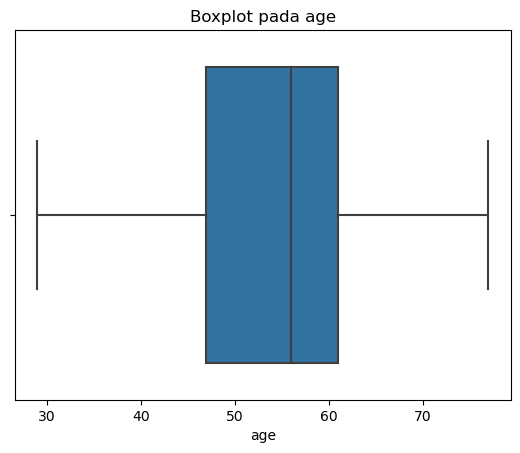

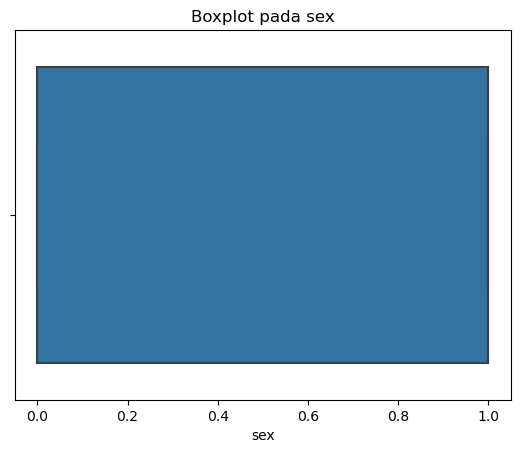

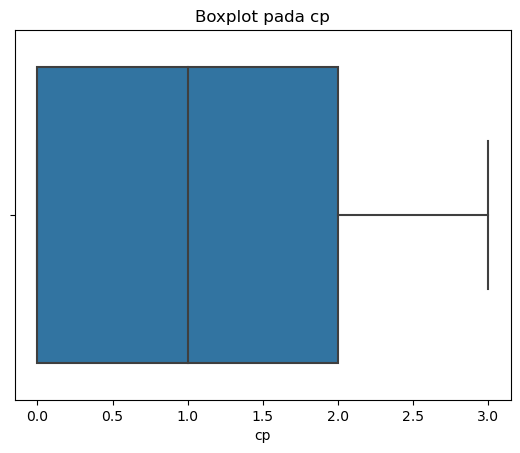

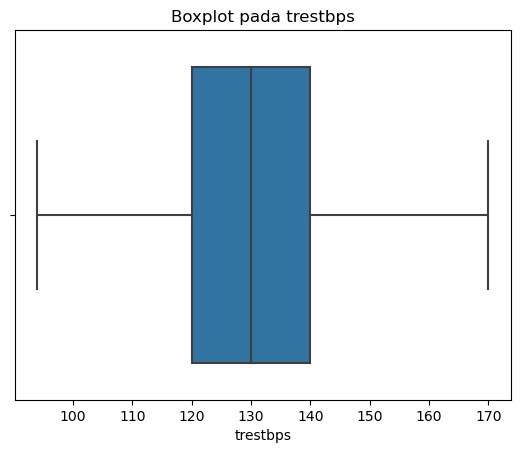

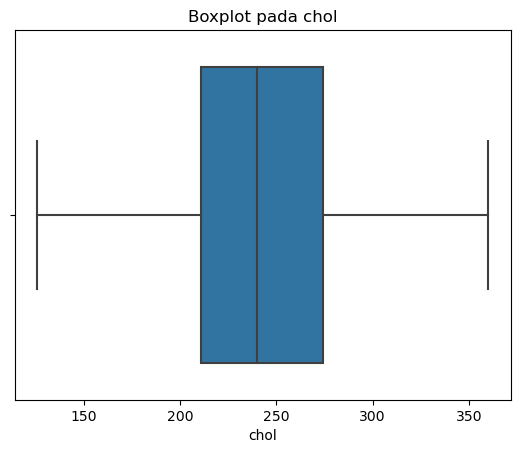

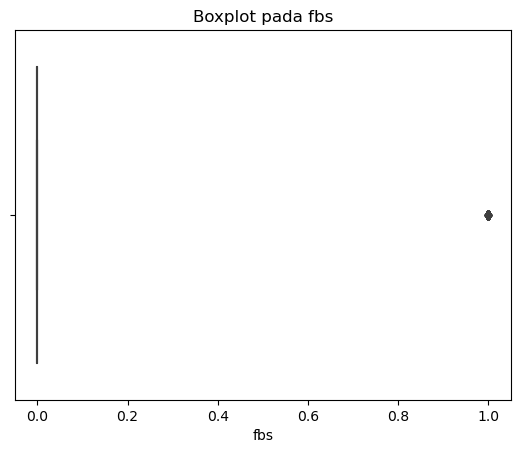

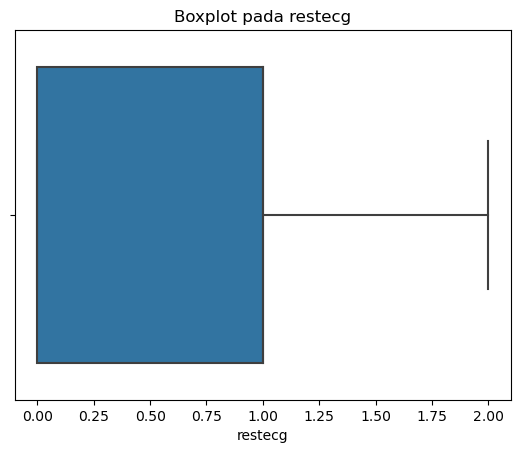

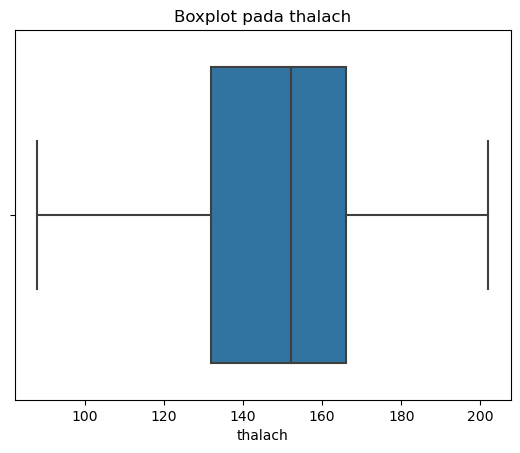

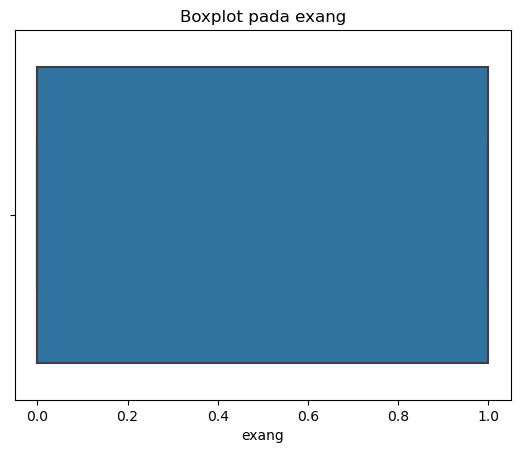

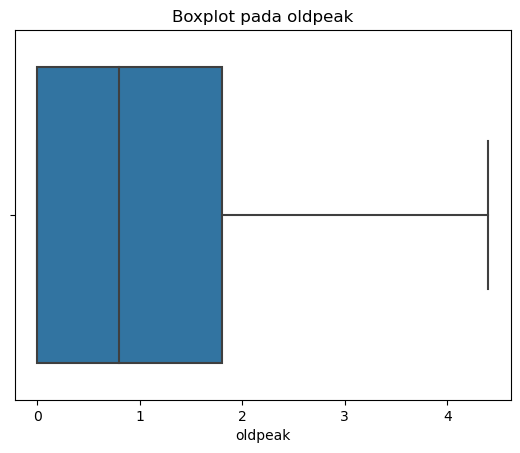

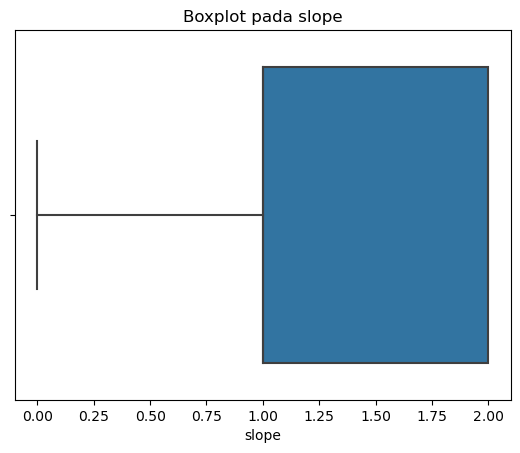

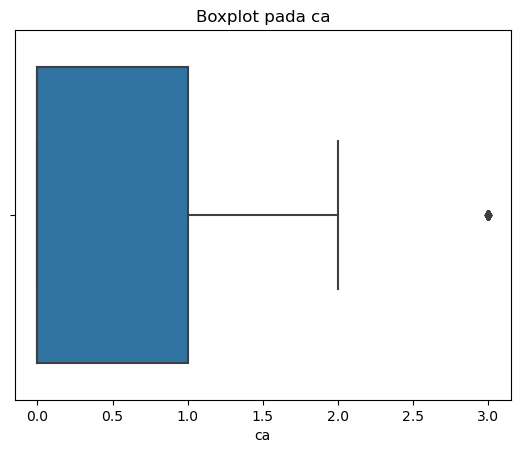

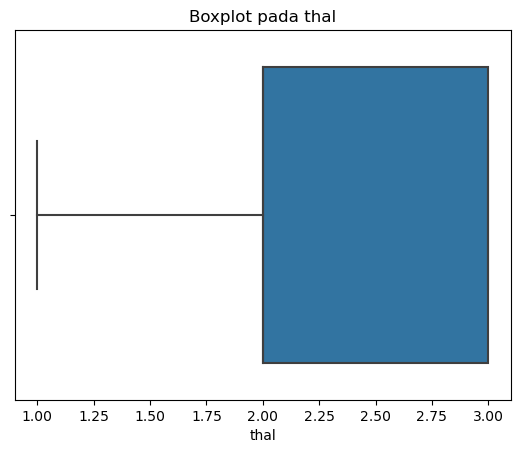

In [16]:
# list variabel untuk membuat boxplot
numerical_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

#Membuat boxplot setelah penanganan Outlier
for feature in numerical_features:
    sns.boxplot( x=data3[feature], data=data3)
    plt.title(f'Boxplot pada {feature}')
    plt.show()

## Imbalance Data

In [17]:
#cek Imbalance
print(data3['target'].value_counts())

target
1    490
0    453
Name: count, dtype: int64


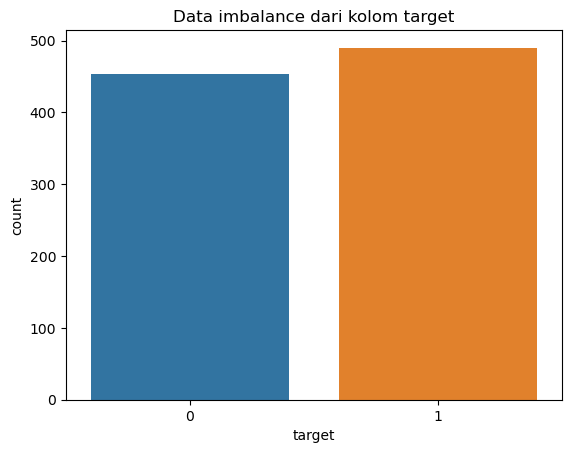

In [18]:
# Visualisasi imbalance data
sns.countplot(x='target', data=data3)
plt.title('Data imbalance dari kolom target')
plt.show()

Meskipun jumlah pada kedua variabel tidak sama, akan tetapi selisihnya tidak terlalu jauh sehingga dataset ini dapat dikatakan memiliki distribusi yang seimbang (Data Balance)

In [19]:
data3.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,54.247084,0.711559,0.952280,129.825027,243.410392,0.136797,0.524920,149.330859,0.328738,1.020573,1.406151,0.691410,2.320255,0.519618
std,9.099324,0.453278,1.031794,15.496254,45.296267,0.343816,0.522492,22.759538,0.470004,1.078038,0.607319,0.932545,0.594814,0.499880
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.400000,2.000000,3.000000,3.000000,1.000000


## Visualisasi Distribusi Tiap Kolom

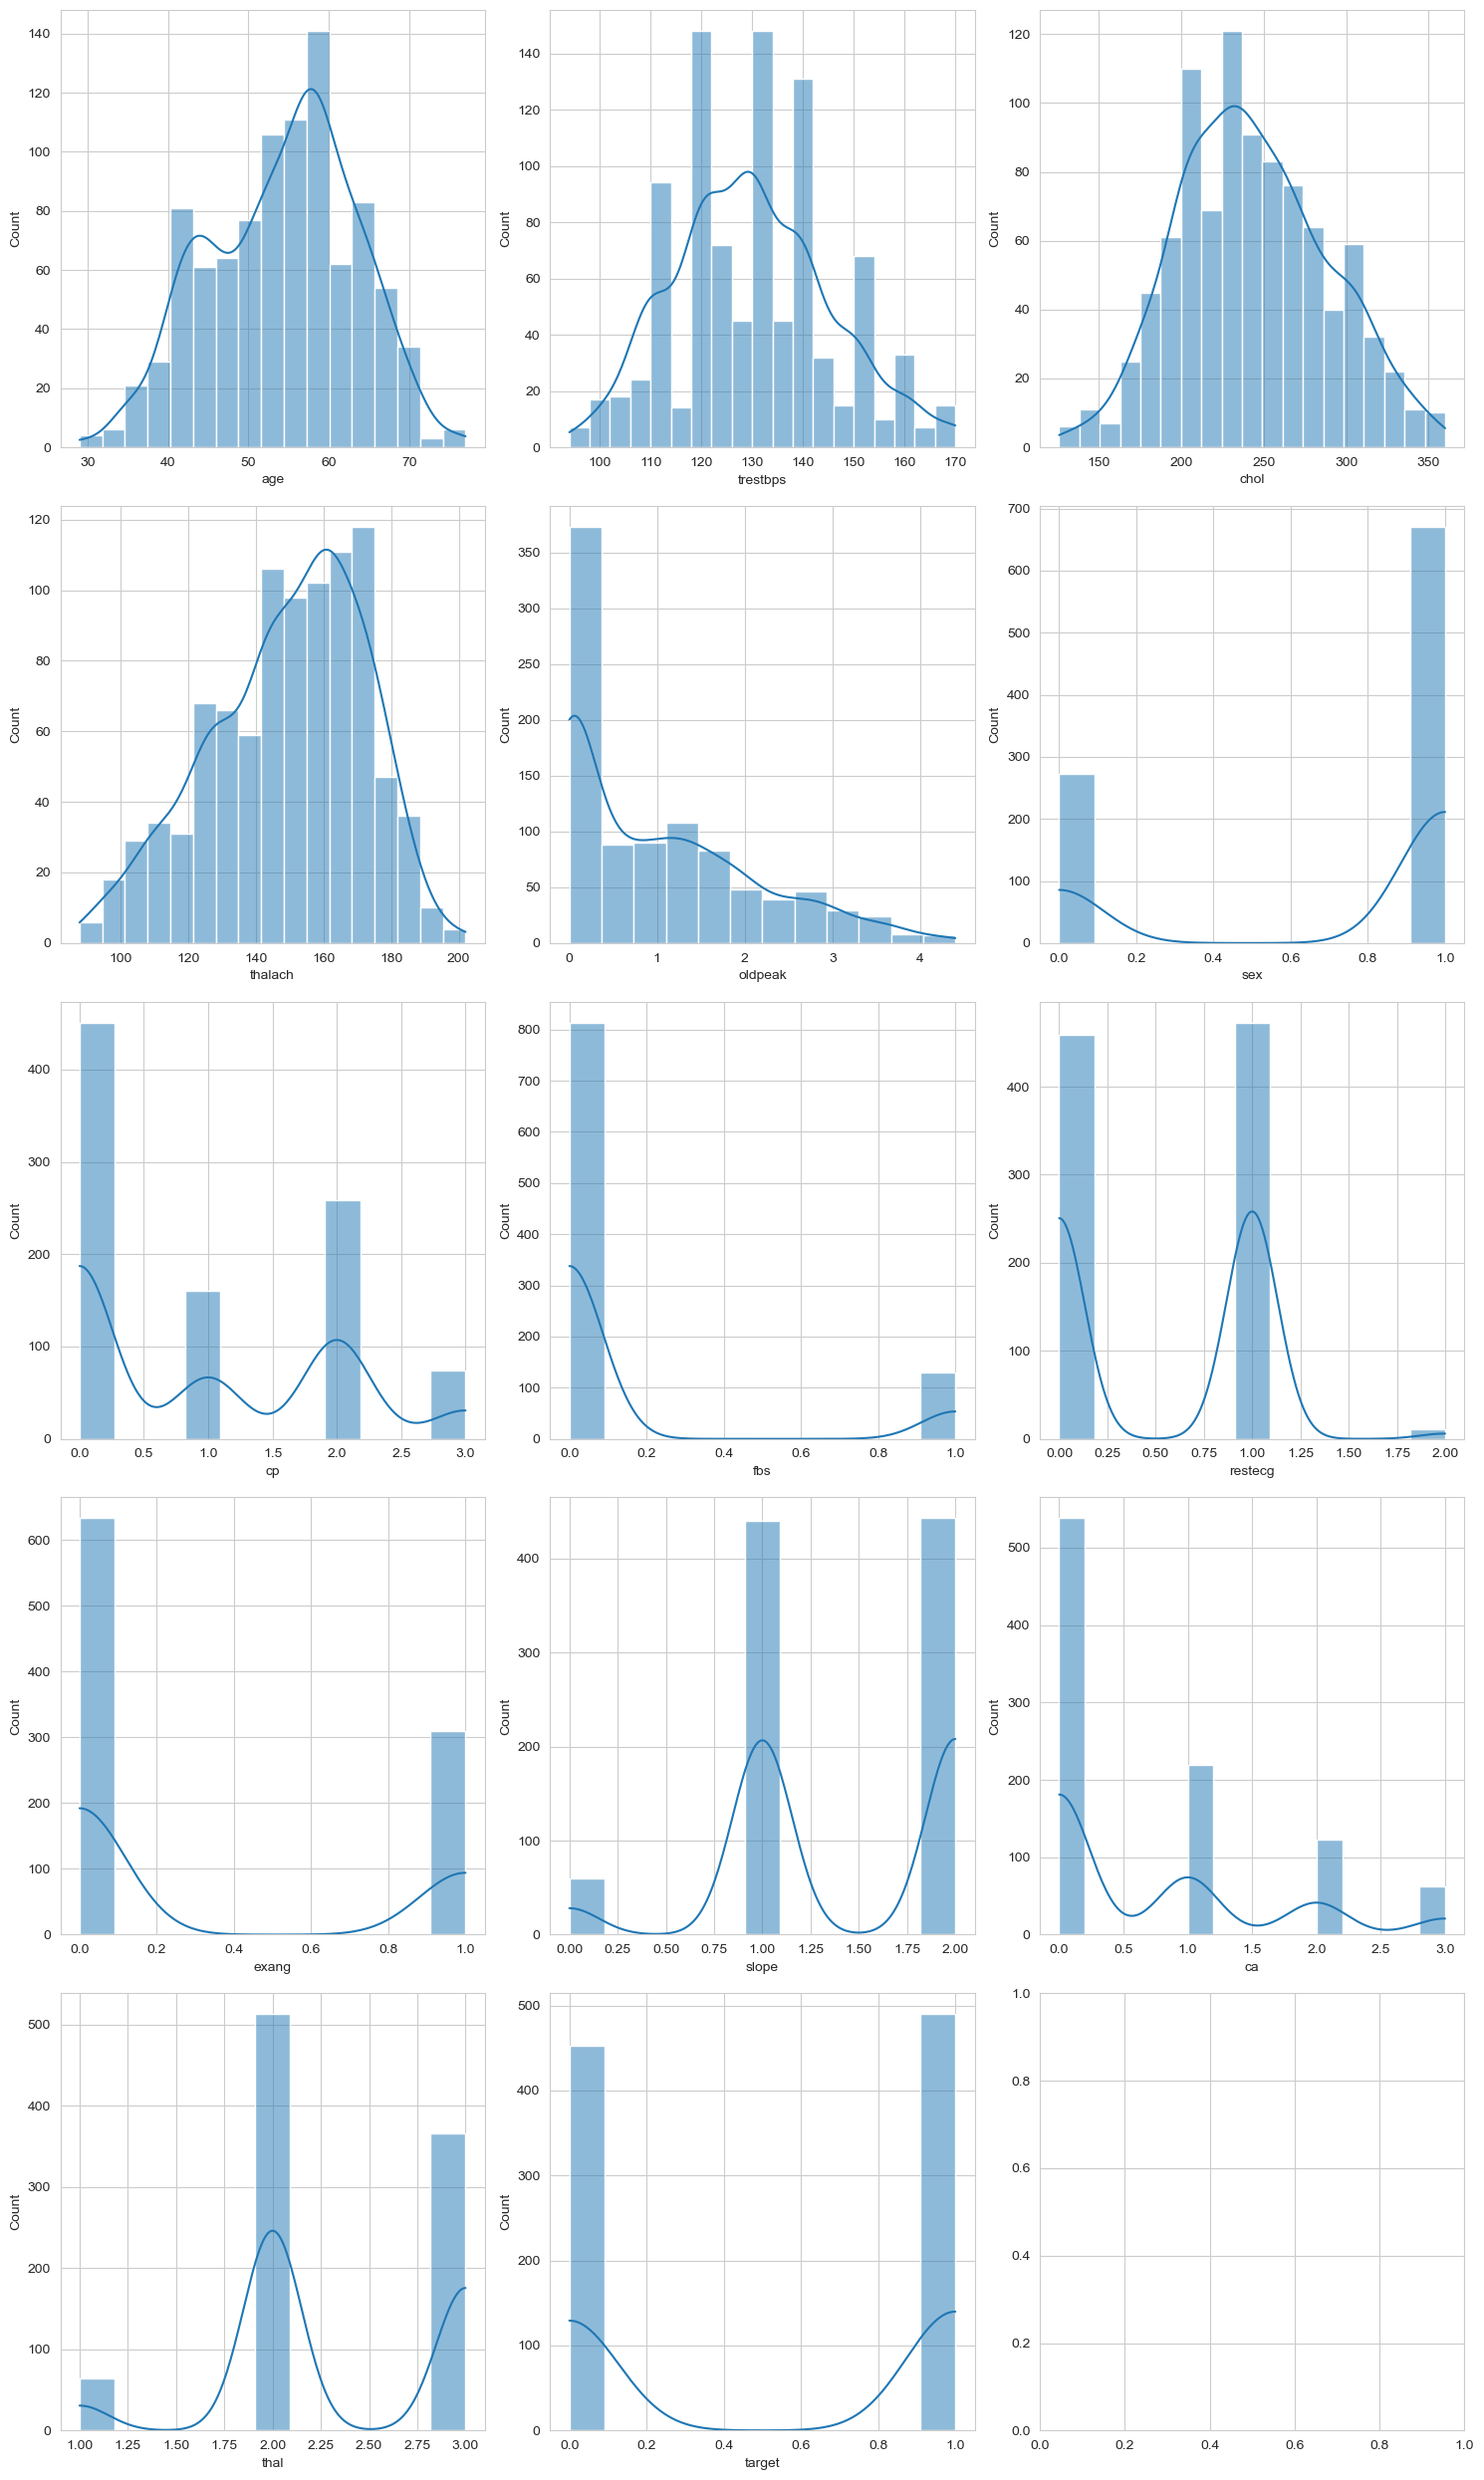

In [20]:
# membuat visualisasi distribusi(histogram) pada masing masing variabel
sns.set_style('whitegrid')

fig, ax = plt.subplots(5, 3, figsize=(15, 25))

sns.histplot(ax=ax[0, 0], data=data3, x='age', kde=True)
sns.histplot(ax=ax[0, 1], data=data3, x='trestbps', kde=True)
sns.histplot(ax=ax[0, 2], data=data3, x='chol', kde=True)
sns.histplot(ax=ax[1, 0], data=data3, x='thalach', kde=True)
sns.histplot(ax=ax[1, 1], data=data3, x='oldpeak', kde=True)
sns.histplot(ax=ax[1, 2], data=data3, x='sex', kde=True)
sns.histplot(ax=ax[2, 0], data=data3, x='cp', kde=True)
sns.histplot(ax=ax[2, 1], data=data3, x='fbs', kde=True)
sns.histplot(ax=ax[2, 2], data=data3, x='restecg', kde=True)
sns.histplot(ax=ax[3, 0], data=data3, x='exang', kde=True)
sns.histplot(ax=ax[3, 1], data=data3, x='slope', kde=True)
sns.histplot(ax=ax[3, 2], data=data3, x='ca', kde=True)
sns.histplot(ax=ax[4, 0], data=data3, x='thal', kde=True)
sns.histplot(ax=ax[4, 1], data=data3, x='target', kde=True)

plt.tight_layout()
plt.show()

## Korelasi antar kolom

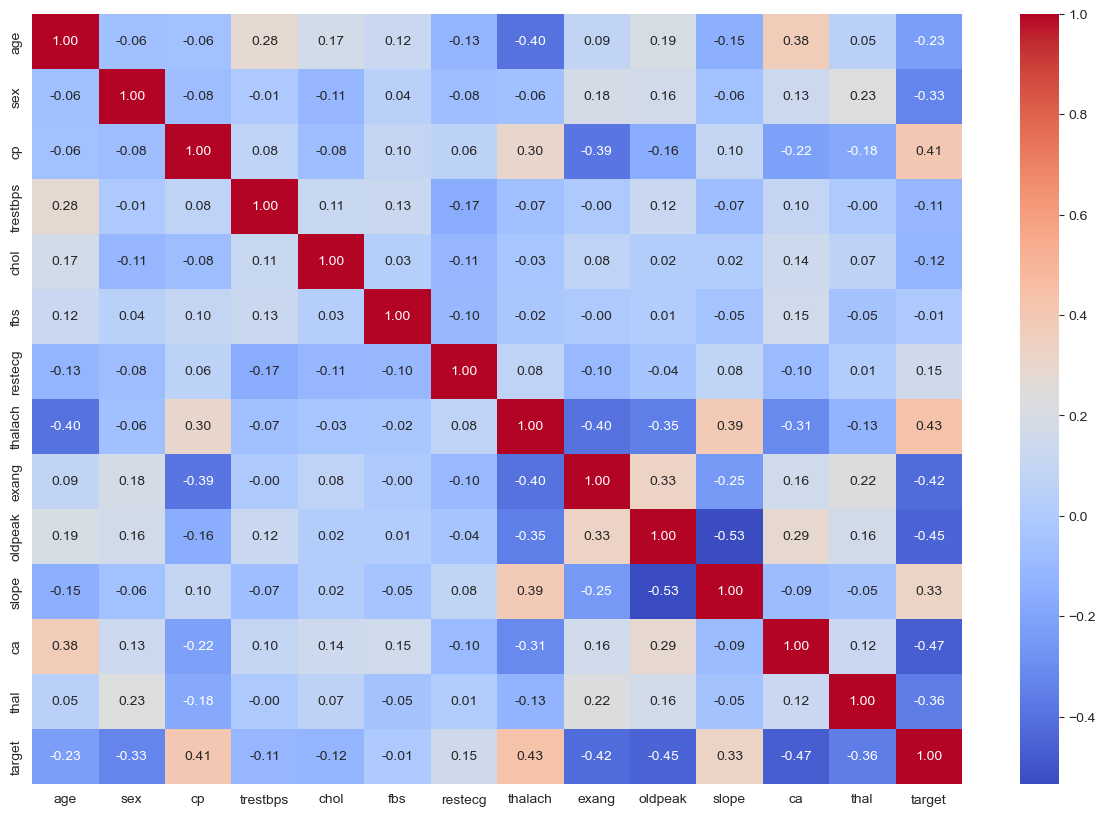

In [21]:
# membuat correlation plot
corr = data3.corr()

# membuat heatmap dengan seaborn
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')

# mengatur ukuran font annotasi
plt.rcParams['font.size'] = 8

plt.show()


In [22]:
# Mengurutkan korelasi
data3.corr()['target'].sort_values()

ca         -0.470918
oldpeak    -0.446740
exang      -0.420577
thal       -0.360329
sex        -0.326382
age        -0.226867
chol       -0.122839
trestbps   -0.110767
fbs        -0.012543
restecg     0.149527
slope       0.325151
cp          0.410372
thalach     0.431726
target      1.000000
Name: target, dtype: float64

Korelasi Target(penyakit jantung) dengan variabel lainnya. Korelasi positif dengan variabel tertentu berarti semakin tinggi variabel tersebut maka akan semakin tinggi juga kemungkinan terkena penyakit jantung, sedangkan korelasi negatif ialah semakin rendah nilai variabel tersebut maka kemungkinan terkena penyakit jantung lebih tinggi.

1. ca -0.465307 (Korelasi Negatif Kuat)
2. oldpeak -0.429798 (Korelasi Negatif Kuat)
3. exang -0.416218 (Korelasi Negatif Kuat)
4. thal -0.386266 (Korelasi Negatif Kuat)
5. sex -0.328636 (Korelasi Negatif Kuat)
6. age -0.227164 (Korelasi Negatif)
7. trestbps -0.101398 (Korelasi Negatif)
8. chol -0.091096 (Korelasi Negatif Lemah)
9. fbs 0.005686 (Korelasi Positif Lemah)
10. restecg 0.162292 (Korelasi Positif)
11. slope 0.313130 (korelasi Positif Kuat)
12. cp 0.411290 (korelasi Positif Kuat)
13. thalach 0.432211 (korelasi Positif Kuat)

Jadi, bisa disimpulkan faktor yang paling berpengaruh terhadap penyakit jantung ialah, sebagai berikut:

1. ca (semakin banyak major vessels ,maka akan semakin tinggi resiko terkena penyakit jantung)
2. thalach (semakin tinggi detak jantung maksimum yang dicapai pasien selama tes latihan, maka resiko terkena penyakit jantung semakin tinggi)
3. oldpeak (Semakin rendah depresi ST yang disebabkan oleh latihan relatif terhadap istirahat, maka resiko terkena penyakit jantung akan semakin tinggi)
4. exang (Apibila exercise induced angina rendah, maka resiko terkena penyakit jantung akan semakin tinggi)
5. cp (Semakin tinggi tipe Jenis rasa sakit pada dada, maka resiko terkena penyakit jantung semakin tinggi)
6. thal(semakin rendah tipe jenis defek jantung, maka resiko terkena penyakit jantung semakin tinggi)
7. sex (Perempuan memiliki resiko terkena penyakit jantung lebih tinggi dibandingkan laki-laki)
8. slope (Semakin tinggi kemiringan segmen latihan ST maka, resiko terkena penyakit jantung semakin tinggi)
9. age (semakin muda umur, ternyata semakin tinggi terkena penyakit jantung)

## Modelling

In [23]:
# Split data
X = data3.drop(['target'], axis=1)
y = data3[['target']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Proses splitting data merupakan pembagian data menjadi data untuk training dan data untuk testing dimana disini saya membagi menjadi 80% data training dan 20% data testing, karena semakin banyak data yang dilatih mesin akan semakin banyak belajar sehingga bisa optimal dalam membangun model nantinya, dimana dengan random state sebanyak 42.

## Logistic Regression

In [25]:
clf = LogisticRegression()

# train the classifier
clf.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = clf.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistic Regression Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistic Regression Classifier is  0.8783068783068783


c:\Users\Daniel\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Daniel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# show report
y_true = y_test
y_pred = clf.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        86
           1       0.87      0.91      0.89       103

    accuracy                           0.88       189
   macro avg       0.88      0.87      0.88       189
weighted avg       0.88      0.88      0.88       189



Model logistic regression mendapat akurasi sebesar 88%

## Random Forest

In [27]:
clf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [400, 1000],
    'max_depth': [15],
    'max_leaf_nodes': [50, 100, 200]
}

gs = GridSearchCV(
        estimator=clf_model,
        param_grid=param_grid,
        cv=10,
        n_jobs=-1,
        scoring='roc_auc',
        verbose=2
    )

fitted_clf_model = gs.fit(X_train, y_train)

print(fitted_clf_model.best_score_)
print(fitted_clf_model.best_params_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


c:\Users\Daniel\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.0
{'max_depth': 15, 'max_leaf_nodes': 100, 'n_estimators': 400}


In [28]:
# Show report
y_true = y_test
y_pred = fitted_clf_model.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        86
           1       1.00      0.97      0.99       103

    accuracy                           0.98       189
   macro avg       0.98      0.99      0.98       189
weighted avg       0.98      0.98      0.98       189



Model Random Forest mendapat akurasi sebesar 98%. Random Forest cocok untuk melakukan klasifikasi pada data heart disease karena model ini dapat memetakan pola dan hubungan antara variabel independen dengan variabel target, serta dapat memecah data menjadi subset yang lebih kecil untuk meningkatkan akurasi model.

## Compare model

- Pada model logistic regression mendapat nilai akurasi sebesai 88%
- Pada model Random Forest didapat nilai akurasi sebesar 98%. Akurasi yang didapat pada model random forest menunjukkan bahwa akurasi yang dihasilkan sangat bagus, akan tetapi perlu melakukan uji lanjutan untuk mengetahui apakah model yang telah dibuat itu overfitting atau tidak. (kemungkinan besar overfitting sehingga perlu dilakukan hyperparameter tuning ulang)

## Cross Validation

In [29]:
X = data3.drop(['target'], axis=1)
y = data3[['target']]

# Inisialisasi model
model = RandomForestClassifier(n_estimators=100)

# Inisialisasi metode cross validation
kfold= KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluasi model menggunakan cross validation
scores = cross_val_score(model, X, y, cv=kfold)

# Hasil evaluasi
print('Cross Validation Score:', scores)
print('Mean Accuracy:', scores.mean())

c:\Users\Daniel\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Daniel\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Daniel\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Daniel\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

Cross Validation Score: [0.98412698 1.         0.98412698 0.98404255 1.        ]
Mean Accuracy: 0.9904593042890916


Hasil cross validation score: 0.98412698, Cross validation score adalah rata-rata skor akurasi model pada beberapa fold.
Dalam kasus ini, model mencapai akurasi rata-rata 99% pada 5 fold.
Hal ini menunjukkan bahwa model mampu memprediksi penyakit jantung dengan sangat akurat.

## Learning Curve

In [30]:
fitted_clf_model.best_params_,fitted_clf_model.best_score_

({'max_depth': 15, 'max_leaf_nodes': 100, 'n_estimators': 400}, 1.0)

In [31]:
features = data3.drop(['target'],axis=1)
target = data3[['target']]
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, validation_scores = learning_curve(
estimator = RandomForestClassifier(max_depth = 6, n_estimators = 400, bootstrap=False, criterion='entropy', max_features='auto',min_samples_leaf=12, min_samples_split=40),
X = data3.drop(['target'],axis=1),
y = data3[['target']], train_sizes = train_sizes, cv = 5,
scoring = 'accuracy' )

In [32]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70)
print('\nValidation scores:\n\n', validation_scores)


Training scores:

 [[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]

 ----------------------------------------------------------------------

Validation scores:

 [[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]


In [33]:
train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index=train_sizes))
print('\n', '-' * 20)
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index=train_sizes))

Mean training scores

 75    NaN
245   NaN
414   NaN
584   NaN
754   NaN
dtype: float64

 --------------------

Mean validation scores

 75    NaN
245   NaN
414   NaN
584   NaN
754   NaN
dtype: float64


C:\Users\Daniel\AppData\Local\Temp\ipykernel_21376\1576207880.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


(0.0, 1.5)

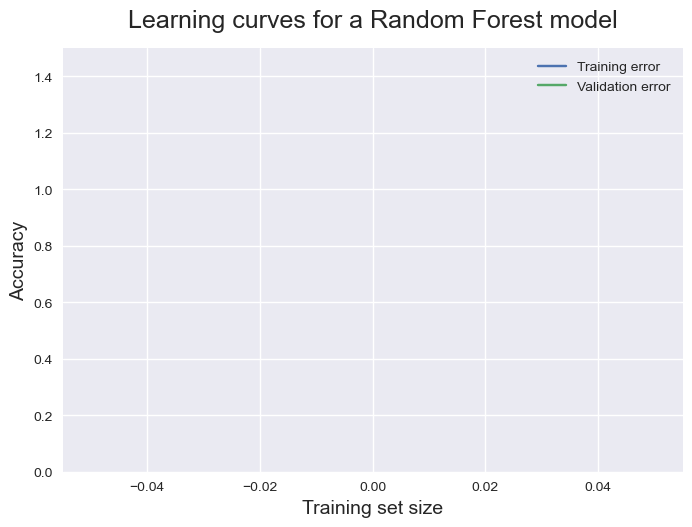

In [34]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Random Forest model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1.5)

Menurut saya, dari learning curve Random Forest di atas didapatkan bahwa model tersebut low bias karena memiliki akurasi training error yang cukup tinggi (diatas 80%). Selain itu model tersebut low variance karena jika dilihat di grafik gap antara training error dan validation error tidak terlalu jauh.

## Hyperparameter Tuning

In [35]:
clf_model = RandomForestClassifier()

#param_grid = {
#    'n_estimators': [400, 700, 1000],
#    'max_depth': [5],
#    'max_leaf_nodes': [50, 100, 200]
#}

param_grid = {'n_estimators': [400, 600], 'min_samples_split': [40, 55, 70], 'min_samples_leaf': [12, 14, 16],
              'max_features': ['auto'], 'max_depth': [3, 4, 5, 6], 'criterion': ['gini', 'entropy'], 'bootstrap': [False]}

gs = GridSearchCV(
        estimator=clf_model,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        scoring='roc_auc',
        verbose=2
    )

fitted_clf_model = gs.fit(X_train, y_train)

print(fitted_clf_model.best_score_)
print(fitted_clf_model.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


ValueError: 
All the 720 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
323 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Daniel\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Daniel\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Daniel\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Daniel\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

--------------------------------------------------------------------------------
397 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Daniel\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Daniel\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Daniel\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Daniel\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


In [ ]:
# Show the classification report
y_true = y_test
y_pred = fitted_clf_model.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89        86
           1       0.90      0.91      0.91       103

    accuracy                           0.90       189
   macro avg       0.90      0.90      0.90       189
weighted avg       0.90      0.90      0.90       189



Setelah dilakukan model random forest dilakukan hyperparameter tuning akurasi model menurun menjadi 90% dari yang awalnya 98%. Turunnya akurasi tersebut bukan menunjukkan hyperparameter tuning yang dilakukan gagal, melainkan hyperparameter tuning yang dilakukan berhasil karena dengan begitu model menjadi sedikit lebih general atau tidak overfitting.

## Metric Evaluation

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 86,   0],
       [  3, 100]], dtype=int64)

Confusion matrix dapat digunakan untuk mengukur performa dalam permasalahan klasifikasi biner maupun permasalahan klasifikasi multiclass. Klasifikasi biner hanya menghasilkan dua ouput kelas (label), seperti “Ya” atau “Tidak”, “0” atau “1” untuk setiap data input yang diberikan. Kelas utama biasanya dinotasikan sebagai data positif dan yang lainnya sebagai data negatif.

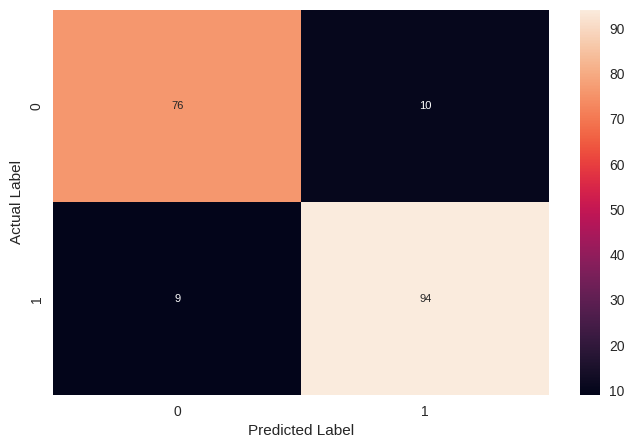

In [ ]:
# Visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Berikut hasil confusion matrix, 0 = Negative, 1 = Positive

In [ ]:
TP = 94
FN = 9
FP = 10
TN = 76

- True Positive (TP) = Seseorang terkena penyakit jantung dan diprediksi terkena penyakit jantung.
- False negative (FN)  = Seseorang terkena penyakit jantung dan diprediksi tidak terkena penyakit jantung. (type 2 error)
- False Positive (FP) = Seseorang tidak terkena penyakit jantung dan diprediksi terkena penyakit jantung. (type 1 error)
- True Negative (TN) = Seseorang tidak terkena penyakit jantung dan diprediksi tidak terkena penyakit jantung.


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89        86
           1       0.90      0.91      0.91       103

    accuracy                           0.90       189
   macro avg       0.90      0.90      0.90       189
weighted avg       0.90      0.90      0.90       189



In [ ]:
# Menghitung nilai precision, recall, f-1 score dari model dalam prediksi data positive

# Precision
precision = TP/(TP+FP)
precision

0.9038461538461539

Precision merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positif. Dari semua kelas positif yang telah di prediksi dengan benar, berapa banyak data yang benar-benar positif.

In [ ]:
# Recall
recall = TP/(TP+FN)
recall

0.912621359223301

recall merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif.

In [ ]:
f1score = 2*precision*recall/(precision+recall)
f1score

0.9082125603864736

f-1 score merupakan dalah harmonic mean dari precision dan recall.

Jadi mana yang harus dipilih? Precision atau recall?

Mana yang lebih buruk? Saat model memprediksi pasien terkena penyakit jantung padahal tidak terkena penyakit jantung? Atau saat model memprediksi pasien tidak terkena penyakit jantung padahal terkena penyakit jantung?

Jawabannya adalah akan jauh lebih fatal jika model memprediksi pasien yang tidak terkena penyakit jantung padahal terkena penyakit jantung. Jadi sebaiknya, model mempunyai nilai recall yang tinggi.

## Hasil prediksi penyakit jantung

In [ ]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [37]:
X = data3.drop(['target'], axis=1)
y = data3[['target']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


Kolom yang dipakai adalah age, sex, cp, trestbps, chol, fbs, thalach, karena berdasarkan informasi yang didapatkan di internet, faktor - faktor yang mempengaruhi seseorang terkena penyakit jantung adalah umur, jenis kelamin, nyeri dada, tekanan darah, kolesterol, gula darah puasa, dan detak jantung.

In [38]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

c:\Users\Daniel\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [ ]:
data3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [40]:
penyakit = np.array([[70, 1, 0, 145, 174, 0, 1, 125, 1, 2.6, 0, 0, 3]])
prediction = model.predict(penyakit)
print(prediction)

if (prediction[0] == 0):
   print('Tidak terkena penyakit jantung')
else:
  print('Terkena penyakit jantung')

[0]
Tidak terkena penyakit jantung


c:\Users\Daniel\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array 0 = tidak terkena penyakit jantung, 1 = terkena penyakit jantung

In [41]:
import pickle


In [42]:
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
import sklearn
sklearn.__version__

'1.3.0'